In [1]:
import numpy as np
import matplotlib.pyplot as plt

# `Segundo Bloque`

In [2]:
from Complementos.root.BS import roo_Bis, Bis

# Implementación método de Euler derecho y izquierdo
def LEuler(f, data, inter=[-1e10, 1e10], Nit=1000, Ndiv=100, eps=1e-05):
    y0, a, b, npt = data
    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    yval = np.zeros(npt)
    
    sol = lambda z, x, y: z - (y+h*f(x, z))
    
    y = y0
    for i, xi in enumerate(xval):
        yval[i] = y
        sol2 = lambda z: sol(z, xi, y)        
        #print(xi, y)
        y = roo_Bis(sol2, inter, Nit=Nit, error='dist', eps=eps, Ndiv=Ndiv)[0]

    return xval, yval

def DEuler(f, data):
    y0, a, b, npt = data
    
    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    yval = np.zeros(npt)
    
    y = y0
    for i, xi in enumerate(xval):
        yval[i] = y
        y += h*f(xi, y)
        
    return xval, yval

### Conexión con los métodos de cuadratura

Con anterioridad deducimos diferentes métodos de resolución de EDO (problema del valor incial) a través de la serie de Taylor, sin embargo, y como se ha expuesto estos se relacionan con los diferentes métodos de cuadraturas que hemos visto. Veamos ahora de forma rápida como relacionarlos.

Cuando resolvemos numéricamente una EDO, el objetivo es dado un paso $x_j\to x_{j+1}$ obtener $y_{j+1}$, es decir
\begin{align}
y'&=f(x, y)\quad \to \quad y(x_{j+1})-y(x_j)=\int_{x_j}^{x_{j+1}} f(x, y(x))dx
\end{align}

Aunque bien es cierto que los métodos de cuadraturas que vimos se centraban en funciones de una variable, la idea a seguir es similar. Por ejemplo, si consideramos aproximar la integral usando la regla del rectángulo con el paso hacia adelante tendremos:
$$
y_{j+1}=y_{j}+hf(x_j, y_j)
$$
Lo cual no es más que el método `Forward Euler`. En el caso en que emplemos la regla del rectángulo con el paso hacia atras llegaremos a:
$$
y_{j+1}=y_{j}+hf(x_{j+1}, y_{j+1})
$$
Lo cual nuevamente no es más que el método `Backward Euler`.

Por otro lado, si empleamos la regla del punto medio para aproximar la integral, tendremos:
$$
y_{j+1}=y_{j}+h f\bigg[x_j+\frac{h}{2}, y\bigg(x_j+\frac{h}{2}\bigg)\bigg]
$$
esto nos lleva a la problemática de evaluar en $h/2$ (recordemos que solo tenemos acceso a combinaciones enteras de $h$). Una vía sería reescribir $\tilde h= 2h$ y obtener la nueva expresión. Sin embargo, la metodología más usual es aproximar $y(x_j+h/2)$ como el promedio de $y_j$ y $y_{j+1}$, es decir:
$$
y_{j+1}=y_{j}+h f\bigg(x_j+\frac{h}{2}, \frac{y_j+y_{j+1}}{2}\bigg)
$$
Nótese que la expresión anterior es implícita, y recibe el nombre de `método implícito del punto medio`.

Si usamos la regla del trapecio para aproximar la integral anterior llegaremos a:
$$
y_{j+1}=y_{j}+\frac{h}{2} \bigg[f(x_j, y_j) + f(x_{j+1}, y_{j+1})\bigg]
$$
La expresión anterior se llama `método del trapezoide implícito`.

`COMENTARIO:` Los dos métodos anteriores resultan ser implícitos, sin embargo se pueden *convertir* en explicítos si usamos el método de Forward Euler para aproximar $y_{j+1}$ en el lado derecho.

### Método Runge-Kutta de cuarto orden (RK4)

Hasta este punto hemos presentado varios métodos (implícitos y explícitos) para resolver EDO que correspondan a un problema de valor inicial. Como vimos podemos arribar a las expresiones ya sea mediante los métodos de cuadratura o usando la prescripción de la serie de Taylor (emparejar los términos orden por orden).

Sin embargo una de las prescripciones más importante es el método de Runge-Kutta de cuarto orden:

<center><img src="capturas/195.png"></center>

Esta prescripción o Ansatz requiere cuatro evaluaciones de funciones para obtener $y_{j+1}$ a partir de $y_j$, es decir, RK4 es un método explícito. Similar al RK2, el RK4 no necesita evaluar ninguna derivada. Aunque en principio es más costoso numéricamente que los métodos que hemos visto con anterioridad este tiene un error local del orden $O(h^{5})$, que es dos órdenes mejor que los hemos visto hasta ahora. Aunque bien es cierto que existen otros métodos que igualan esta precisión, en muchas ocasiones son técnicas o enfoques para casos particulares de EDO (ver ejemplo extrapolación de Richardson), siendo RK4 el *caballito de batalla* preferido por muchos.

Esta prescripción implica evaluaciones en $x_j$ y $x_{j+1}$, así como en su punto medio $x_j+h/2$, y las $k_0, k_1, k_2$ y $k_3$ son aproximaciones a la pendiente en los puntos.

La demostración matemática del Ansatz anteriores puede llegar a ser sumamente [tedioza](https://en.wikipedia.org/wiki/Runge–Kutta_methods) y consiste en extender la implementación realizada para el caso RK2. Sin embargo la idea general se puede entender si examinamos dos casos extremos de
$f(x,y)$: 
- el caso donde $f$ no depende de $y$, 
- el caso donde $f$ no depende de x (una EDO autónoma).  

**Primer caso:**

Debido a que la función solo depende de $x$, tendremos que:
\begin{align}
y'&=f(x)\quad \to \quad y(x_{j+1})-y(x_j)=\int_{x_j}^{x_{j+1}} f(x)dx
\end{align}

La expresión anterior es identica al problema que presentamos al resolver una integral de forma numérica. En esa ocasión vimos que la regla de Simpson (1/3) nos ofrecía la mejor precisión.

<center><img src="capturas/94.png"></center>

Aplicando los pesos anteriores tendremos
$$
y_{j+1}=y_j+\frac{h}{6}\bigg[f(x_j)+4f(x_j+h/2)+f(x_{j}+h)\bigg]
$$

donde tuvimos presente que la regla de Simpson (1/3) ocupa dos paneles (es decir $x_{j} \to 2\tilde{h}x_{j}$), y tuvimos que reescribirla $h\to 2\tilde{h}$. Si comparamos con la prescripción para RK4, nos damos cuenta de que cuando $f$ no depende de $y$ tenemos $k1 = k2 = h f(x_j + h/2)$. Lo que hace que $y_{j+1}$ de la prescripción RK4 coincida con el resultado anterior.


 Por lo tanto, cuando $f$ no depende de $y$ el método de Runge-Kutta de cuarto orden es equivalente a la regla de Simpson (1/3). Lo cual tiene sentido ya que valida que el error local es del orden $O(h^5)$.

**Segundo caso:**

Examinemos ahora el otro extremo, cuando la EDO es autónoma, es decir, $f(y)$. Consideremos el caso visto con anterioridad:
$$
y'(x)=\mu y(x)
$$

A continuación empleemos la metodología vista para el caso RK2, es decir, comparemos con una expansión de Taylor del lado derecho solución la prescripción RK4.

Al evaluar en la prescripción RK4 tendremos:
<center><img src="capturas/196.png"></center>

Ahora si expandimos en serie de Taylor el lado derecho, nuestra tarea se reduce a expandir $y(x)$, y como sabemos, la solución analítica es $y(x)=c e^{\mu x}$, lo que nos lleva a:
<center><img src="capturas/197.png"></center>

donde se usó que:
<center><img src="capturas/198.png"></center>

Si comparamos ambos resultados vemos que como se afirmó, RK4 concuerda con una serie de Taylor de 4to orden, y no captura la información proveniente de términos de orden igual o superior a $h^{5}$, es decir su error local es de orden $h^{5}$, lo que lleva a un error global es de orden $h^{4}$.

In [3]:
# Implementacion

def rk4(f, data):
    y0, a, b, npt = data

    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    yval = np.zeros(npt)
    
    y = y0
    for j, xi in enumerate(xval):
        yval[j] = y
        k0 = h*f(xi, y)
        k1 = h*f(xi+h/2, y+k0/2)
        k2 = h*f(xi+h/2, y+k1/2)
        k3 = h*f(xi+h, y+k2)
        y += (k0 + 2*k1 + 2*k2 + k3)/6
           
    return xval, yval

**Veamos a continuación dos ejemplos**

- Primero

$$
y'(x)=\mu y(x), \quad y(0)=1
$$

Solución analítica $y(x)=e^{\mu x}$.

(-0.05, 1.01)

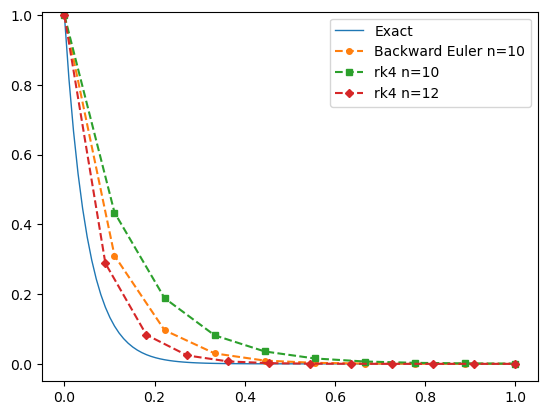

In [78]:
mu = -20 
f = lambda x, y: mu*y
fsol = lambda x: np.exp(mu*x)



a, b = 0, 1
y0 = 1.

xrange = np.linspace(a, b, 100)
plt.plot(xrange, fsol(xrange), ls='-', lw=1, label='Exact')

k = 0
markers = ['s', 'D']
for i in [10, 12]:
    data = [y0, a, b, i]
    
    if k==0:
        xvalL, yvalL = LEuler(f, data)
        plt.plot(xvalL, yvalL, ls='--', marker='o', markersize=4, label='Backward Euler n=%d'%i)
    
    xvalD, yvalD = rk4(f, data)
    plt.plot(xvalD, yvalD, ls='--', marker=markers[k], markersize=4, label='rk4 n=%d'%i)

    k += 1

#plt.yscale('log')
plt.legend(loc='best', frameon=True)
plt.ylim(-0.05, 1.01)

- Segundo caso *[ecuación de Riccati](https://en.wikipedia.org/wiki/Riccati_equation)*

$$
y'(x)=-y(x)^2+\frac{2x}{1-x^2}y(x)-\frac{30}{1-x^2},\quad y(0.05)=19.53
$$

la solución analítica es:
$$
y=y_0+\Phi(x)\bigg[C-\int f(x) \Phi(x) dx\bigg]^{-1}
$$
donde $C$ es una constante arbitraria y
$$
\Phi(x)\equiv \exp\bigg\{\int [2 f(x) y_0+g(x)]dx\bigg\}
$$
las funciones $f(x), g(x), h(x)$ corresponden a los coeficientes que acompañan a $y^2, y^1, y^0$ respectivamente.

(-50.0, 21.0)

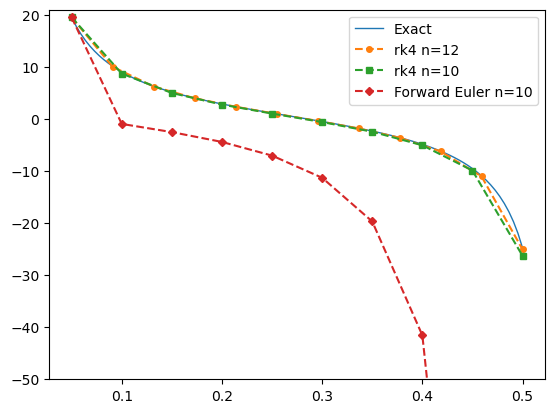

In [62]:
f = lambda x, y: -y**2+2*x*y/(1-x**2)-30/(1-x**2)
fsol = lambda x: (1.4591566243681633e6+x*(3.5873015873015874+x*(-2.1887349365522448e7+x*(-13.333333333333332+x*(5.107048185288571e7\
                +(10.-3.0642289111731425e7*x)*x))))+(-0.23809523809523808+3.5714285714285716*x**2-8.333333333333334*x**4+5.*x**6)*np.log(1.-1.*x)\
                +(0.23809523809523808-3.5714285714285716*x**2+8.333333333333334*x**4-5.*x**6)*np.log(1. + x))/((-1.+x)*(1.+x)*(0.13544973544973546\
                +x*(-1.459156624368163e6+x*(-1.5555555555555556+x*(6.809397580384762e6+(2.-6.128457822346285e6*x)*x)))\
                +x*(0.23809523809523808-1.1111111111111112*x**2+x**4)*np.log(1.-1.*x)+x*(-0.23809523809523808+1.1111111111111112*x**2\
                -1.*x**4)*np.log(1. + x)))

k = 0
markers = ['o', 's', 'D']
a, b = 0.05, 0.5
y0 = 19.53
xrange = np.linspace(a, b, 100)
plt.plot(xrange, fsol(xrange), ls='-', lw=1, label='Exact')

for i in [12, 10]:
    data = [y0, a, b, i]
    xvalD, yvalD = rk4(f, data)
    plt.plot(xvalD, yvalD, ls='--', marker=markers[k], markersize=4, label='rk4 n=%d'%i)
    
    if k==1:
        xvalL, yvalL = DEuler(f, data)
        plt.plot(xvalL, yvalL, ls='--', marker='D', markersize=4, label='Forward Euler n=%d'%i)
       
    k += 1

#plt.yscale('log')
plt.legend(loc='best', frameon=True)
plt.ylim(-50, 21)

Nótese que en ambos ejemplos RK4 parece ser muy robusto y estable. Aún cuando nos enfrentamos a problemas de estabilidad (primer caso), o ODE no lineales como el segundo caso. ¡¡PARECE PERFECTO!!

Sin embargo, esto es demasiado bueno para ser verdad. Se debe distinguir entre la estabilidad de un método dado y el mal condicionamiento de un problema dado. 
- Hay problemas `bien condicionados` que algunos métodos no logran resolver (decimos que son inestables) y otros métodos logran resolver (decimos que son estables). 
- Por otra parte, existen problemas `mal condicionados` que **NINGÚN** método puede esperar abordar de manera muy fructífera. 
- Entre estos dos extremos, hay problemas `levemente mal condicionados` que pueden ser difíciles de resolver incluso si se emplea un método generalmente estable.

El mal condicionamiento de una EDO se conoce como *stiffness* (rigidez): una EDO rígida hace que muchos métodos sean inestables. Cuantificar la rigidez en el caso general puede resultar bastante complicado. Veamos un ejemplo específico:

`Ejemplo 1`:
$$
y'(x)=501 e^x-500y(x)\quad y(0)=0
$$

La solución exacta es: $y=e^x-e^{-500x}$.

(-0.005, 0.16)

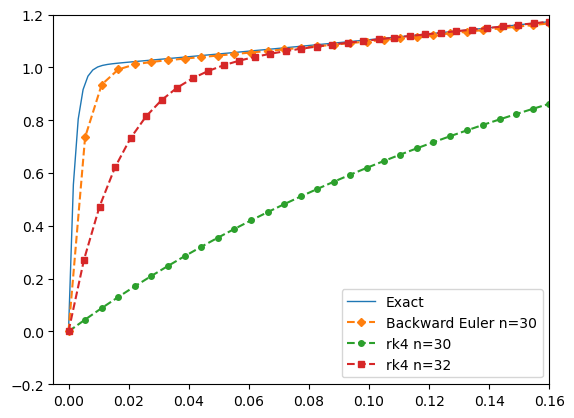

In [80]:
f = lambda x, y: 501*np.exp(x)-500*y
fsol = lambda x: np.exp(x)-np.exp(-500*x)

k = 0
markers = ['o', 's', 'D']
a, b = 0, 0.16
y0 = 0
xrange = np.linspace(a, b, 100)
plt.plot(xrange, fsol(xrange), ls='-', lw=1, label='Exact')

for i in [30, 32]:
    data = [y0, a, b, i]
    
    if k==0:
        xvalL, yvalL = LEuler(f, data)
        plt.plot(xvalL, yvalL, ls='--', marker='D', markersize=4, label='Backward Euler n=%d'%i)

    xvalD, yvalD = rk4(f, data)
    plt.plot(xvalD, yvalD, ls='--', marker=markers[k], markersize=4, label='rk4 n=%d'%i)
           
    k += 1

#plt.yscale('log')
plt.legend(loc='best', frameon=True)
plt.ylim(-0.2, 1.2)
plt.xlim(-0.005, 0.16)

El problema anterior nos pone fin al triunfalismo que habíamos tenido respecto al RK4. De manera general siempre hemos de tener cuidado a la hora de realizar el estudio numérico de una EDO.

### Pasos adaptativos

El problema anterior nos mostró la necesidad de resolver la EDO usando valores para $h$ (en su efecto $n$) más pequeños. Esto plantea la pregunta ¿cuántos puntos debemos usar en nuestra integración numérica?

Hasta ahora hemos asumido que el valor para $n$ escogido es lo suficientemente bueno que garantice la convergencia y siempre será el mismo en todo el intervalo de integración. Sin embargo, ambas suposiciones son cuestionables a la hora de resolver EDO de problemas físicos reales, sería bueno tener una rutina automática, que determine por sí sola cuántos pasos usar; Sería incluso mejor si dicha rutina pudiera subdividir el problema en regiones de *fácil* y *difícil* integración, distribuyendo adecuadamente el número total de puntos.

#### Ajuste global

Como vimos anteriormente, podemos relacionar el método de RK4 con la regla de Simpson y vimos que para este (de manera general se cumple para cualquier método) era posible definir una integración adaptativa que nos garantizara que la precisión global deseada se cumpliera. ¿Recuerdan? La idea era realizar el cálculo con $N$ puntos, luego duplicar el número de puntos $N'=2N$ y repetir el cálculo. Usando ambos resultados podiamos computar el error mediante la fórmula
\begin{equation}
\epsilon_{N'} =\frac{I_{N'}-I_N}{15}
\end{equation}
y detener la iteración si este error era menor que el definido por el usuario.

Pues de manera análoga, podemos usar la misma derivación y obtener una expresión analítica que nos permita mediante un ciclo garantizar que el error global definido se cumpla. Supongamos que resolvemos una EDO en el intervalo $[a, b]$ usando $n$ puntos. De esta integración obtenemos que la aproximación para $y(b)$ es $y_{n-1}$. Repetimos el mismo cálculo pero ahora usando el doble de los puntos $n'=2n-1$ (es decir $N'=2N$) lo que nos arroja que la aproximación para $y(b)$ ahora es $y_{n'-1}$. Usando que el error global es del orden  de $h^4_{N}$, tendremos que:
$$
y(b)=y_{n-1}+c h^{4}_{N}=y_{n'-1}+c h^{4}_{N'}
$$
lo que usando la relación entre $N$ y $N'$ nos arroja:
$$
\epsilon_{n'}=\frac{1}{15}(y_{n'-1}-y_{n-1})
$$

Notese que lo anterior es el error absoluto, en caso que se desee el relativo se ha de dividir entre $y_{n'-1}$ (asumiento que es la mejor aproximación de los dos).

`Comentario:` el usar esta metodología no mejora la aproximación, solo nos evita la  necesidad de especificar un valor para $n$, en lugar de eso se preestable una tolerancia global específica para nuestra aproximación a $y(b)$ y se van duplicando el número de puntos hasta que se alcance la precisión definida. La ventaja de este esquema adaptativo es que no tenemos que preocuparnos demasiado por los detalles de nuestro problema: el algoritmo seguirá usando más puntos hasta que se satisfaga la tolerancia a errores definida.

#### Ajuste local

Del comentario anterior es obvio que el esquema adaptativo anterior es incapaz de capturar los comportamientos locales puesto que sigue utilizando un espaciado equidistante en todas las regiones (solo duplica el número total de puntos utilizados). En otras palabras, el esquema global utiliza un tamaño para $h$ sin importar el comportamiento de la solución en ciertas regiones, no capturaría de manera eficaz funciones que exhiban mucha estructura (comportamientos no regulares) en una región y poca en otra. (Uno podría estar tentado a utilizar más valores de $N$, sin embargo se puede cumplir el error global y aún así no capturar el comportamiento local, ver ejemplo).

La idea sería entonces entonces definir un esquema que aumente el número de puntos en las regiones donde la función presente más estructuras y en las que no, los disminuya (puntos más separados). Este comportamiento nos permitiría tratar EDO que sean levemente mal condicionadas. 

**Metodología:** La idea en general es muy parecida a la desarrollada para el caso global, pero conceptualmente es diferente. Se parte de un punto $x_j$ y se consideran un paso de iteración $x_j+h$ lo que nos arrojaría $y(x_j+h)$:
$$
y(x_j+h)=\tilde y_{j+1}+k h^5+O(h^6)
$$
donde se usó que el error local es del orden $h^5$ y se definió la notación $\tilde y_{j+1}$ para señalar que corresponde al calculado con un paso de iteración. A continuación consideremos dos pasos de iteración, el primero de $x_j \to x_j+h/2$ y luego de $x_j+h/2 \to x_j+h$, teniéndose que para el primer paso
$$
y\left(x_j+\frac{h}{2}\right)=\bar y_{j+1/2}+k \bigg(\frac{h}{2}\bigg)^5+O(h^6)
$$
para el segundo tendremos
$$
y(x_j+h)=\bar y_{j+1}+ 2k \bigg(\frac{h}{2}\bigg)^5+O(h^6)
$$
donde se asumió que $k$ es constante en los pasos de integración (algó válido si el paso es pequeño).

Usando los resultados anteriores para $y(x_j+h)$ tendremos:
$$
\bar{y}_{j+1}-\tilde y_{j+1}=\frac{15}{16}k h^5
$$
lo que nos conduce a 
$$
y(x_j+h)=\bar y_{j+1}+ \frac{1}{15}(\bar  y_{j+1}- \tilde  y_{j+1})+O(h^6)
$$

Por otro lado, usando el hecho que la diferencia entre $\bar  y_{j+1}- \tilde  y_{j+1}$ escala como $h^5$, podemos establecer la siguiente relación:
$$
\frac{|\bar  y_{j+1}- \tilde  y_{j+1}|}{\triangle}=\left(\frac{h}{\bar h}\right)^5
$$
donde $\bar h$ es el paso necesitado para que la diferencia entre $\bar  y_{j+1}- \tilde  y_{j+1}$ sea igual a la tolerancia absoluta $\triangle$ definida.

Resolviendo la relación anterior llegamos a:
$$
\bar h =\alpha h\bigg| \frac{\triangle}{\bar  y_{j+1}- \tilde  y_{j+1}}\bigg|^{0.2}
$$
donde $\alpha<1$ y es conocido como *safety factor* ya que asegura que la estimación siempre sea pequeña. Usualmente se define como 0.8 o 0.9.

`Comentario:` Nótese que la cuación anterior nos relaciona el valor para $\bar h$ en dependencia del valor obtenido de la razón entre $\bar  y_{j+1}- \tilde  y_{j+1}$ y $\triangle$. Si $\bar  y_{j+1}- \tilde  y_{j+1}>\triangle$ tendremos que el valor de $\bar h$ sería menor. En el caso contrario, $\bar  y_{j+1}- \tilde  y_{j+1}<\triangle$ el valor para $\bar h$ se incrementaría.


`Comentario:` Los códigos más actuales de RK4 con paso adaptativo local, utilizan una combinación de RK5 y RK4 como forma de cuantificar el error local, en lugar de los cálculos de un solo paso y de dos pasos empleados anteriormente.

**Tarea:** Implemente un código de RK4 donde el usuario pueda usar ya sea el método global como el local. Intente reproducir la figura 8.6 del libro Numerical Methods with Python.

## Sistemas de EDO

Hasta ahora nos hemos centrado en problemas del valore inicial para EDO de orden uno. Sin embargo, y como vimos al inició de esta lectura pueden existir EDO de orden superior. Tales sistemas pueden ser reducidos a un sistema de EDO de primer orden.

### EDO de segundo Orden

En el ámbito científico las ecuaciones que más se suelen resolver son de segundo orden (ya se discutió el porque de ello). A continuación emplearemos todo lo visto anteriormente para resolver numéricamente este tipo de problemas numéricos, pero para ello debemos primero convertir la EDO en un sistema tipo:
<center><img src="capturas/199.png"></center>

donde ahora tendremos dos funciones independientes $y_0(x)$, $y_1(x)$.

**Reducción de orden de la EDO**

Consideremos la EDO siguiente:
$$
w''=f(x, w, w'),\quad w(a)=c,\quad w'(a)=d
$$

como se aprecia, las condiciones iniciales se dan enel mismo punto $x=a$, y por tanto estamos ante un problema de valor inicial. Si realizamos el siguiente cambio de variables
$$
y^{(0)}(x)=w(x),\quad y^{(1)}(x)=w'(x)=y^{(0)}{}'(x)
$$
tendremos que la EDo se podría escribir como:
<center><img src="capturas/200.png"></center>

lo cual, puede ser resuelto usando cualquiera de las metodologías vistas para elcaso de EDO de primer orden. En el caso de RK4, lo que tendremos es lo siguiente 
$$
y^{(0)}_{j+1}=y^{(0)}_{j}+\frac{1}{6}(k^{(0)}_0+2k^{(0)}_1+2k^{(0)}_2+k^{(0)}_3)
$$
$$
y^{(1)}_{j+1}=y^{(1)}_{j}+\frac{1}{6}(k^{(1)}_0+2k^{(1)}_1+2k^{(1)}_2+k^{(1)}_3)
$$

donde ahora tendremos que computar las funciones $k^{(0, 1)}_i$ para cada caso como:
\begin{align}
k^{(0, 1)}_0 &= h f^{(0, 1)}\left(x_j, y^{(0)}_j, y^{(1)}_j\right)\\
k^{(0, 1)}_1 &= h f^{(0, 1)}\left(x_j+\frac{h}{2}, y^{(0)}_j+\frac{k^{(0, 1)}_0}{2}, y^{(1)}_j+\frac{k^{(0, 1)}_0}{2}\right)\\
k^{(0, 1)}_2 &= h f^{(0, 1)}\left(x_j+\frac{h}{2}, y^{(0)}_j+\frac{k^{(0, 1)}_1}{2}, y^{(1)}_j+\frac{k^{(0, 1)}_1}{2}\right)\\
k^{(0, 1)}_3 &= h f^{(0, 1)}\left(x_j+h, y^{(0)}_j+k^{(0, 1)}_2, y^{(1)}_j+k^{(0, 1)}_2\right)
\end{align} 

Notar que el super índice $(0, 1)$ indica que función $f$ o $k_{i}$ utilizaremos.


### EDO de Orden arbitrario

A continuación generalicemos la metodología anterior para un sistema de orden $\nu$. De manera directa uno puede notar que la notación pasaría a ser vectorial, es decir
<center><img src="capturas/201.png"></center>

lo que en forma compacta se puede escribir como:
<center><img src="capturas/202.png"></center>

De manera similar al caso anterior. Podemos generalizar cualquier método de resolución visto. Para el caso de RK4, tendremos que 
<center><img src="capturas/203.png"></center>

lo cual es muy facil de implementar utilizando las ventajas de numpy.

`Comentario:` Aunque nos centramos en sistemas de EDO obtenidos de reducir el orden a una EDO de orden superior. La metodología es igual de válida para un sistema EDO arbitrario.

In [3]:
# Implementacion

def RK4Met(func, data, arg=None):
    """
    func -> (x, yval, a, b, ..) donde a, b, .. son argumentos que se han de pasar como listas a la variable arg
    """
    if arg:
        f = lambda x, yv: np.array(func(x, yv, *arg))
    else:
        f = lambda x, yv: np.array(func(x, yv))
    xval, yval = rk4Gene(f, data)
    
    return xval, yval
    

def rk4Gene(f, data):
    y0v, a, b, npt = data

    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    nEq = len(y0v)
    yval = np.zeros((npt, nEq))  # crea una matriz (npt, nEq)
    
    yv = np.copy(y0v)
    for j, xi in enumerate(xval):
        yval[j, :] = yv
        k0 = h*f(xi, yv)  # importante como se define la función, tiene que ser de la forma f(x, yv) donde yv=[y0, y1, ...]
        k1 = h*f(xi+h/2, yv+k0/2)
        k2 = h*f(xi+h/2, yv+k1/2)
        k3 = h*f(xi+h, yv+k2)
        yv = yv + (k0 + 2*k1 + 2*k2 + k3)/6
        #yv += (k0 + 2*k1 + 2*k2 + k3)/6
           
    return xval, yval

**Ejemplo:** Resuleva numéricamente las ecuaciones de [Lotka-Volterra](https://es.wikipedia.org/wiki/Ecuaciones_de_Lotka-Volterra) que describen el comportamiento de dos especies. Una de ellas depredadora de la otra. Este modelo viene dado por el sistema de EDO:
\begin{align}
x'(t) = a x - b x y, \quad x(t_0)=x_0\\
y'(t) = -c y +d x y, \quad y(t_0)=y_0
\end{align}

donde $x(t)$ representa el número de presas que hay a un timepo $t$, mientras que $y(t)$ el número de depredaddores a ese tiempo. El comportamiento específico del sistema dependerá de la relación entre los parámetros positivos $a, b, c, d$ que representan lainteracción entre las dos especies.

In [4]:
# implementación

def fs(x, yv, a, b, c, d):  # x->t .  y0, y1 -> x, y 
    y0, y1 = yv 
    
    f0 = a*y0-b*y0*y1
    f1 = -c*y1+d*y0*y1
    return [f0, f1]

y0, y1 = 10, 15
y0v = [y0, y1]

t0, tf = 0, 25
npt = 200
data = [y0v, t0, tf, npt]

a, b, c, d = 1.2, 0.08, 0.5, 0.2
x, y = RK4Met(fs, data, arg=[a, b, c, d])  # recordar que y[j, :] donde j es presas, depredador

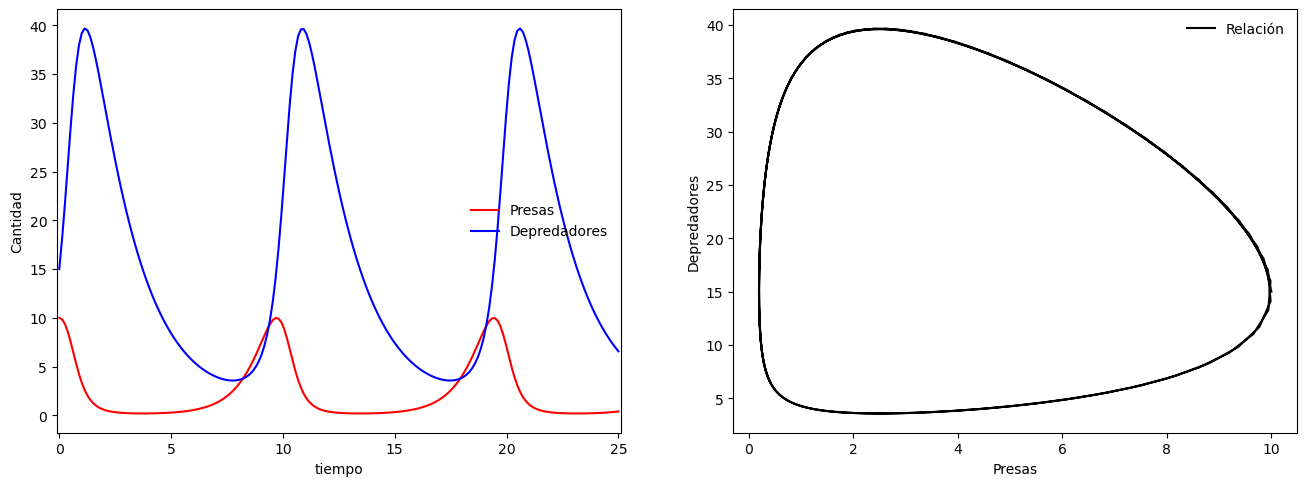

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(x, y[:, 0], c='red', label=r'Presas')
ax[0].plot(x, y[:, 1], c='blue', label=r'Depredadores')

ax[0].set_xlabel('tiempo')
ax[0].set_ylabel('Cantidad')
ax[0].legend(frameon=False)

ax[0].set_xlim(t0-0.1, tf+0.1)

############

ax[1].plot(y[:, 0], y[:, 1], c='k', label='Relación')

ax[1].set_xlabel('Presas')
ax[1].set_ylabel('Depredadores')
ax[1].legend(frameon=False)


## Problemas del Valor en la frontera (Boundary-Value Problems)

Hasta ahora nos hemos enfocado en tratar los problems tipo Valor inicial, sin embargo, como fue comentado al inicio de esta conferencia podemos enfrentarnos a un problema de valores como condiciones de frontera:
$$
y''= f(x, y, y'),\quad y(a)=c, \quad y(b)=d.
$$
donde las cantidades $y(a)=c, \quad y(b)$ son los valores en la frontera. Como se aprecia, no conocemos el valor de la derivada en uno de los puntos, por ejemplo $y'(a)=¿?$. Este desconocimiento nos impide emplear todo lo visto hasta ahora. 

Entonces, ¿cómo podemos abordar este problema?

A continuación, se abordarán dos enfoques generales para resolver este problema:
- Tratarlo como una versión más complicada de un problema de valor inicial,
- Intentar formular un método que su punto de partida sean estas condiciones a la frontera.

#### Método de Shooting 

El problema de los valores a la frontera no es un problema del valor inicial debido a que desconocemos el valor de $y'(a)$ (la información necesaria para comenzar a integrar desde $a$). Sin embargo, podemos reducir nuestra situación a un problema de valor incial si *adivinamos* el valor de $y'(a)$. No se asusten, en verdad no adivinamos el valor, sino que empezamos a probar diferentes valores de tal forma que en uno de esos *disparos* (shooting) demos en el blanco y obtengamos el valor $y(b)=d$. El obtenerlo nos garantizaría partir de una condición inicial para $y'(a)$ acorde a los valores en la frontera.

<center><img src="capturas/204.png"></center>

Aunque en la figura anterior le atinamos en tres intentos, la realidad es que es extremadamente improbable que una suposición aleatoria pueda satisfacer la condición de frontera $y(b)$. Sin embargo, para funciones bien comportadas podemos utilizar ideas similares al método de Bisección o algún otro método de busqueda de raices.

Intentemos reformular la prescripción anterior de una manera más sistemática. Supongamos que nuestra entrada es $w(a) = c$ y $w(b) = d$. Esto se traduciría a $w_0 = c$ y $w_{n−1} = d$, con nuestra incógnita es $w'{}_0$ (w'(a)). Partiendo de un supuesto valor conocido $\sigma$, es decir, $w'{}_0=\sigma$, podemos entonces resolver la EDO usando uno de los métodos vistos anteriormente y obtener $w_{n−1}$. En otras palabras, se ha de programar una función shoot que internamente use un método para resolver la EDO, pero que tenga como parámetro de entrada el valor para $\sigma$ el cual será escogído por algúno de los métodos de busqueda de raices, donde ahora la igualdad será con $w_{n−1} = d$, es decir
$$
g(\sigma)=d
$$
donde $g$ no es una función analítica conocida, es el resultado de llevar a cabo una solución completa del problema con valores iniciales desde $a$ hasta $b$.

In [4]:
# implementación

def shoot(func, sig, y0, x0, xf, yf, npt, arg=None): 
    y0v = [y0, sig]  # notar que la derivada es la segunda
    data = [y0v, x0, xf, npt]   
    _, ys = RK4Met(func, data, arg=arg)
    #print(ys[-1, 0]-yf, ' ', ys[-1, 0], yf, sig)
    return ys[-1, 0]-yf

def shooting(func, datos, arg=None, inter=[-1e10, 1e10], Nit=1000, Ndiv=100, eps=1e-05):
    sig, y0, yf, x0, xf, npt = datos
    sol2 = lambda sig: shoot(func, sig, y0, x0, xf, yf, npt, arg=arg)
    #yder = Bis(sol2, inter, Nit=Nit, error='dist', eps=eps)
    yder = roo_Bis(sol2, inter, Nit=Nit, error='dist', eps=eps, Ndiv=Ndiv) 
    return yder

In [18]:
y0, sig = 10, 8  # y1=15
yf = 0.4049995541328063
x0, xf = 0, 25
npt = 200
datos = [sig, y0, yf, x0, xf, npt]
derVal = shooting(fs, datos, arg=[a, b, c, d], inter=[0, 20], Nit=1000, Ndiv=100, eps=1e-08)  #[10, 22]
derVal

[0.01992976424669978,
 1.0895045778968115,
 3.5923658898382476,
 15.0,
 17.333714149215005]

In [24]:
# Como se aprecia hay mas de una posible solución para obtener el valor y[b]
# lo anterior ocurre pq el sistema es no lineal.
# Comparemos nuestro resultado anterior con alguna de las condiciones iniciales encontradas
y0, y1 = 10, derVal[3]
y0v = [y0, y1]

t0, tf = 0, 25
npt = 200
data = [y0v, t0, tf, npt]

a, b, c, d = 1.2, 0.08, 0.5, 0.2
x, y = RK4Met(fs, data, arg=[a, b, c, d])  # recordar que y[j, :] donde j es presas, depredador

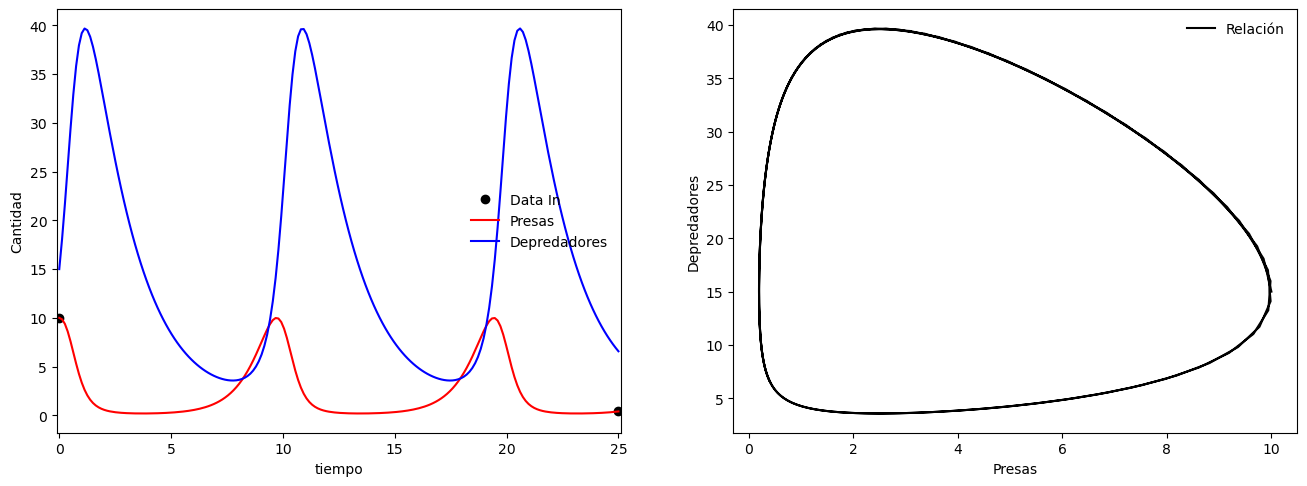

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot([t0, tf], [y0, yf], 'ko', label=r'Data In')
ax[0].plot(x, y[:, 0], c='red', label=r'Presas')
ax[0].plot(x, y[:, 1], c='blue', label=r'Depredadores')

ax[0].set_xlabel('tiempo')
ax[0].set_ylabel('Cantidad')
ax[0].legend(frameon=False)

ax[0].set_xlim(t0-0.1, tf+0.1)

############

ax[1].plot(y[:, 0], y[:, 1], c='k', label='Relación')

ax[1].set_xlabel('Presas')
ax[1].set_ylabel('Depredadores')
ax[1].legend(frameon=False)

#### Método de Matricial (método de diferencia finita) 

Como vimos anteriormente el método de Shooting es un método aproximado y aunque puede garantizar buenos resultados no resuelve el sistema en sí. En adición, la EDO de segundo orden debe ser reescrita como un sistema de primer orden. A continuación veremos un método que nos permite resolver tal cual la ecuación haciendo uso de las condiciones a la fronteras específicas.

Como sabemos el problema a resolver es:
$$
w''=f(x, w, w'), \quad w(a)=c,\quad w(b)=d
$$

Ahora, si aplicamos la fórmula de diferencia central para la primera y segunda derivada (recordar)

<center><img src="capturas/205.png"></center>

Pordemos escribir la EDO de segundo orden como:

<center><img src="capturas/206.png"></center>

Notar que en este caso tenemos como incógnitas solo las $w_j$. Veamos ahora con un ejemplo como implementarlo.

Considere la siguiente EDO de segundo orden:
$$
w(x)''=f(x, w, w')
$$
donde 
<center><img src="capturas/207.png"></center>

Si discretizamos aplicando el método de diferencia finitas (la expresión anterior), tendremos que:

<center><img src="capturas/208.png"></center>

donde como se aprecia la primera línea estaría relacionada con las $w_{j-1}, w_j$ y $w_{j+1}$. Mientras que la segunda sería simplemente $w_0, w_j$. Las expresiones anteriores se pueden acomodar de tal forma que aparezcan ''organizadas'' las $w$

<center><img src="capturas/209.png"></center>

donde 

<center><img src="capturas/210.png"></center>

¿Ya es evidente que lo anterior lo podemos escribir como una matriz?

Noten que podemos definir un vector $W$, y una matriz $A$ que corresponda a los coeficientes discretos $\alpha_j, \beta_j, \gamma_j$. Es decir:

<center><img src="capturas/211.png"></center>

Entonces para encontrar $W=\{w_0, w_i, ...., w_j\}^{T}$ solo debemos resolver
$$
A W = b \quad \to \quad W= A^{-1}b 
$$

`Notemos que:`
- Los coeficientes evaluados en las $x_j$ son diagonales, sin incluir la primera y última fila.
- A menos que la matriz sea singular, estaríamos resolviendo el sistema sin ninguna aproximación. Sin embargo, como veremos en futuras clases, el costo cumputacional de invertir la matriz puede ser considerable si $n$, el número de puntos usados lo es.

In [40]:
# implementación
def matriz(data, info=False):
    a, b, b0, bf, npt = data
    h = (b-a)/(npt-1)
    xi = a + np.arange(npt)*h
    
    # creando alpha, beta, gamma discretos
    denom = (1-xi**2)
    alphaj = 1 + h*xi/denom
    betaj = -2 + 30*h**2/denom
    gamma = 1 - h*xi/denom
    
    # Creando la matriz de dimensión n x n
    A = np.zeros((npt, npt))
    np.fill_diagonal(A[:, :], betaj)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:-1, :], alphaj[1:])  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:, 2:], gamma[1:])  # recordar que no incluye el x_0
    A[0, 0] = 1
    A[-1,-1] = 1
    
    # creando vector B
    bs = np.zeros(npt)
    bs[0] = b0
    bs[-1] = bf
    
    if info:
        print(alphaj[1], betaj[1], gamma[1])
        print(alphaj[-2], betaj[-2], gamma[-2])
        print(A)

    return A, bs, xi

In [41]:
a, b, b0, bf, npt = 0.05, 0.49, 0.0926587109375, 0.11177050858750004, 400
data =  [a, b, b0, bf, npt]
A, bs, xi = matriz(data, info=False)
invA = np.linalg.inv(A)  # A^{-1}
W = np.dot(invA, bs)  # W=A^{-1} b

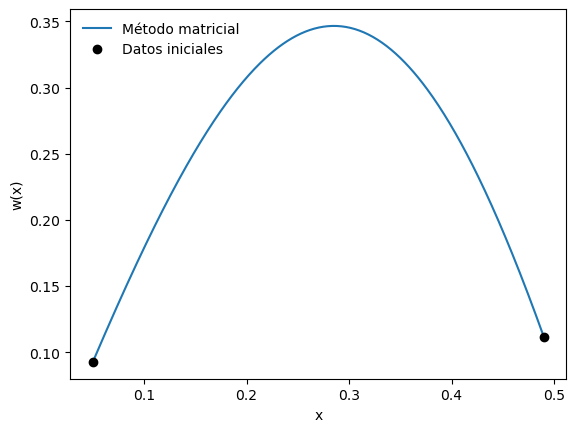

In [53]:
# graficando el resultado
plt.plot(xi, W, label=r'Método matricial')
plt.plot([a, b], [b0, bf], ls='', c='k', marker='o', label=r'Datos iniciales')
plt.xlabel(r'x')
plt.ylabel(r'w(x)')
plt.legend(frameon=False)

**Comentarios**

Para información sobre `np.fill_diagonal` [checar](https://numpy.org/doc/stable/reference/generated/numpy.fill_diagonal.html)

In [31]:
# Ejemplo de funcionamiento de fill_diagonal:
n = 6
A = np.zeros((n, n))

np.fill_diagonal(A[:, :], 1)
np.fill_diagonal(A[1:-1, :], 2)
np.fill_diagonal(A[1:, 2:], 3)

A

array([[1., 0., 0., 0., 0., 0.],
       [2., 1., 3., 0., 0., 0.],
       [0., 2., 1., 3., 0., 0.],
       [0., 0., 2., 1., 3., 0.],
       [0., 0., 0., 2., 1., 3.],
       [0., 0., 0., 0., 0., 1.]])

In [43]:
# Obteniendo la condición inicial mediante la metodología de shooting
def fs(x, yv):  # x->t .  y0, y1 -> x, y 
    y0, y1 = yv 
    
    f0 = y1
    f1 = -30*y0/(1-x**2)+2*x*y1/(1-x**2)
    return [f0, f1]

sig = 2.
a, b, b0, bf, npt = 0.05, 0.49, 0.0926587109375, 0.11177050858750004, 400
datos = [sig, b0, bf, a, b, npt]
wP0 = shooting(fs, datos, inter=[0, 20], Nit=1000, Ndiv=100, eps=1e-08)  # valor de la derivada en el origen

In [46]:
# resolviendo RK4
y0v = [b0, wP0[0]]
data = [y0v, a, b, npt]

x, y = RK4Met(fs, data) 

Text(0, 0.5, 'w(x)')

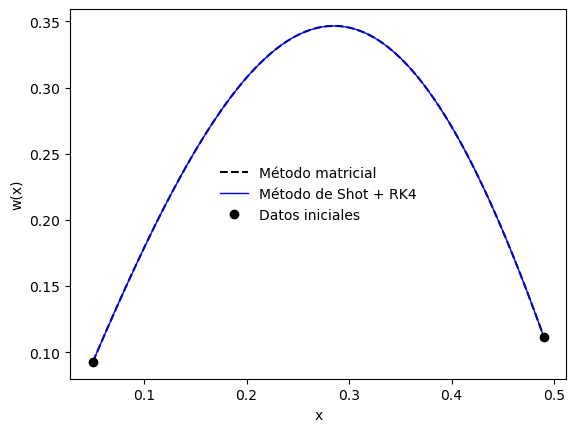

In [54]:
# Graficando el resultado obtenido usando ambs metodologías

plt.plot(xi, W, '--k', label=r'Método matricial')
plt.plot(x, y[:,0], 'b-', lw=1, label=r'Método de Shot + RK4')
plt.plot([a, b], [b0, bf], 'ko', label=r'Datos iniciales')
plt.legend(frameon=False)
plt.xlabel(r'x')
plt.ylabel(r'w(x)')

## Problemas de autovalores

Veamos ahora una subclase de problemas de valores en la frontera. En este caso a parte de los términos usuales ($x, w(x), w'(x), w''(x)$) aparece otro parámetro $s$, conocido como valor propio. La estructura sería la siguiente:
$$
w''=f(x, w, w'; s),\quad w(a)=c, w(b)=d
$$

Notar que tiene la misma estructura anterior, con la única diferencia es la presencia de $s$. `Esto significa que no estamos ante una única ecuación diferencial, sino una familia de EDO`.

Ahora, puede ocurrir que para algunos valores dados de $s$ no haya solución para la EDO correspondiente; por lo tanto, tendremos que calcular los valores *interesantes* de $s$ (es decir, los que conducen a una solución) además de producir una aproximación a $w(x)$. Consideremos los casos con la estructura:
$$
w''(x)=\chi(x) w'(x)+\eta(x) w(x)+\theta(x) s w(x)
$$
donde las funciones $\chi(x), \eta(x), \theta(x)$ son conocidas. `En el caso que se pongan condiciones homogéneas a la frontera, este problema se reduce Sturm-Lioville`.

Para resolver la EDO anterior hemos de hacer uso de los métodos vistos anteriormente para el problema de la frontera (shooting y matricial). A continuación estudiaremos la ecuación de *Mathieu*, que aparece en el estudio de las vibraciones de las cuerdas y en muchos otros temas de física. Este ejemplo servirá para comprender cómo emplear los métodos anteriores en la resolución de este tipo de EDO:
$$
w''(x)=[2q \cos(2x)-s]w(x), \quad w(0)=w(2\pi)
$$

Notar que las condiciones de frontera indican es que la solución es períodica (algo que se puede inferir de la presencia de la función coseno). Por otro lado, el parámetro $s$ será la incógnita a encontrar de tal forma que conduzcan a soluciones no triviales (es decir, distintas de cero) para $w(x)$. Y el conjunto de sus valores representaría un espectro de soluciones. El parámetro $q$ determina la fuerza del término coseno y se mantendrá fijo (en un valor finito) en lo que sigue. 

`Pregunta:` ¿Que ecuación queda si $q=0$?

#### Usando Shooting

Anteriormente vimos que podíamos usar el método de shooting para encontrar la condicion $w'(a)$ que nos permitiera satisfacer los valores de $w$ en la frontera. Ahora, uno pensaría que tendríamos que usar este método para aplicar un *doble shooting*, uno que nos encuentre el valor de $s$ y otro que encuentre el valor de $w'$. Bueno, no necesariamente, veamos que ocurre en este tipo de EDO.

Analicemos la ecuación, ¿notan algo? Qué creen que ocurra si cambiamos $w(x)=\alpha \tilde w(x)$, ¡la EDO sigue siendo la misma! Es decir, la EDO es lineal en $w$ y tiene esa libertad de escalamiento, lo que significa que si $w(x)$ es una solución, entonces tambien $\alpha w(x)$ lo será. Por otro lado analicemos la expresión para los valores en la frontera (pongamoslo de forma general):
$$
w(a)=w(b)=cte.
$$
como se aprecia también la misma libertad de escalamiento $\alpha w(a)= \alpha w(b)=cte$. 

¿Qué implica esta libertad de escalimento?

Pues resumiendo implica que el considerar diferentes valores $w'(a)$ no cambia la solución, solo la reescala, como se aprecia en la figura:

<center><img src="capturas/212.png"></center>

se consideró $q=1.5, s=4.25$.

Lo anterior se puede deducir del siguiente razonamiento lógico:  $\alpha w(x)$ para $x=a$, tendrémos entonces que $\alpha w'(a)$, lo que implica que $\alpha$ solo normaliza la solución. Por ejemplo, en la figura el perfil obtenido para $w'(0)=1.5$, corresponde al obtenido para $w'(0)=1.0$ con un escalamiento $\alpha=1.5$.

Resumiendo, el valor de $w'(a)$ no juega un rol importante en el shooting, si encontramos una solución $w$, las demás serán un escalamiento de esta. Por tanto es el parámetro $s$ quien mediante su variación nos permitirá satisfacer las condiciones de frontera.

Text(0.5, 0, 'x')

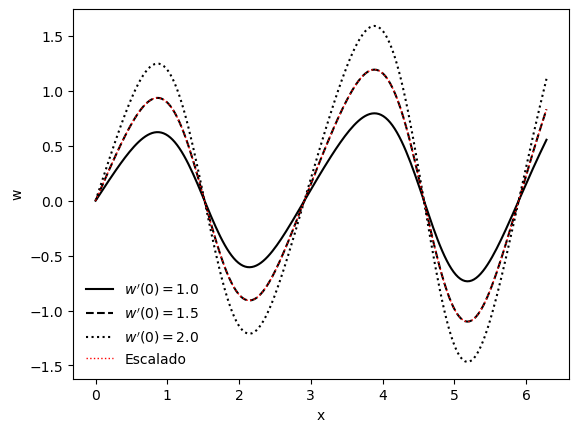

In [57]:
# Veamos el escalamiento
def fs(x, yvals, s): 
    q = 1.5
    y0, y1 = yvals
    f0 = y1
    f1 = (2*q*np.cos(2*x) - s)*y0 
    return [f0, f1]

s = 4.25
x0, xf = 0, 2*np.pi
npt = 200
k = 0
Ls = ['-', '--', ':']
for i in [1, 1.5, 2]:
    y0v = [0, i]
    data = [y0v, x0, xf, npt]
    x, y = RK4Met(fs, data, arg=[s])
    plt.plot(x, y[:,0], ls=Ls[k], c='k', label=r'$w^{\prime}(0)=%3.1f$'%i)
    k += 1

# escalemos el último para llegar al primer
alp = 1.5/2  
plt.plot(x, y[:,0]*alp, c='r', ls=':', lw=1, label=r'Escalado')
  
plt.legend(frameon=False)
plt.ylabel('w')
plt.xlabel('x')

Resumiendo, tendremos entonces que en este tipo de EDO es el parámetro $s$ el que debemos variar para satisfacer las condiciones de frontera, como se ve en la figura:
<center><img src="capturas/213.png"></center>

Notar que lo que debemos hacer es fijar un valor no nulo para $\omega'(a)$ y hacer el shooting sobre $s$. Notar que cualquiera otra solución $w(x)$ se podría obtener de escalar la obtenida luego del shooting.

Text(0.5, 0, 'x')

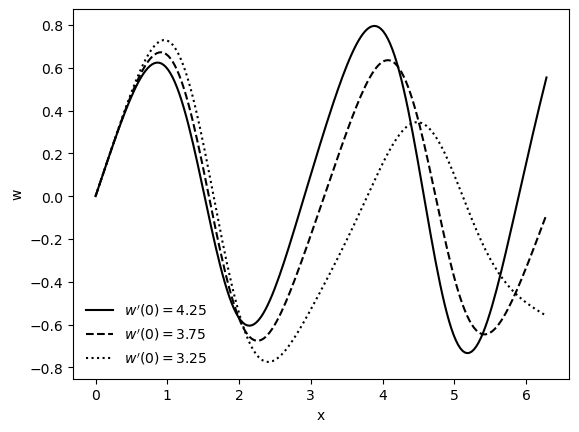

In [58]:
y0v = [0, 1]  # fijamos w'=1
data = [y0v, x0, xf, npt]
x0, xf = 0, 6.5
npt = 200
k = 0
Ls = ['-', '--', ':']
for i in [4.25, 3.75, 3.25]:
    x, y = RK4Met(fs, data, arg=[i])
    plt.plot(x, y[:,0], ls=Ls[k], c='k', label=r'$w^{\prime}(0)=%3.2f$'%i)
    k += 1
  
plt.legend(frameon=False)
plt.ylabel('w')
plt.xlabel('x')

In [59]:
# implementación NOTAR QUE ADAPTÉ LEVEMENTE LOS ANTERIORES
def shootS(func, s, dy0, y0, x0, xf, yf, npt): 
    y0v = [y0, dy0]
    data = [y0v, x0, xf, npt]   
    _, ys = RK4Met(func, data, arg=[s])
    #print(ys[-1, 0]-yf, ' ', ys[-1, 0], yf, sig)
    return ys[-1, 0]-yf

def shootingS(func, datos, arg=None, inter=[-1e10, 1e10], Nit=1000, Ndiv=100, eps=1e-05):
    dy0, y0, yf, x0, xf, npt = datos
    sol2 = lambda s: shootS(func, s, dy0, y0, x0, xf, yf, npt)
    #yder = Bis(sol2, inter, Nit=Nit, error='dist', eps=eps)
    yder = roo_Bis(sol2, inter, Nit=Nit, error='dist', eps=eps, Ndiv=Ndiv) 
    return yder

In [66]:
def fs(x, yvals, s): 
    q = 1.5  # podemos intentar ponerlo también como parámetro
    y0, y1 = yvals
    f0 = y1
    f1 = (2*q*np.cos(2*x) - s)*y0 
    return [f0, f1]

# Pongamos las condiciones de frontera homogeneas
dy0 = 1.  # provemos con otro valor 5 por ejemplo
a, b, b0, bf, npt = 0., 2*np.pi, 0, 0, 400
datos = [dy0, b0, bf, a, b, npt]
Inter = [-1, 10]  # intervalo donde buscaremos el espectro
wP0 = shootingS(fs, datos, inter=Inter, Nit=1000, Ndiv=100, eps=1e-08)  # valor de la derivada en el origen, aumentar Ndiv
wP0

[-0.8426695750586352,
 -0.7332651429439908,
 2.7279738415425756,
 3.8142909817959207,
 6.477781846295649,
 9.092609271931291]

(0.0, 1.0)

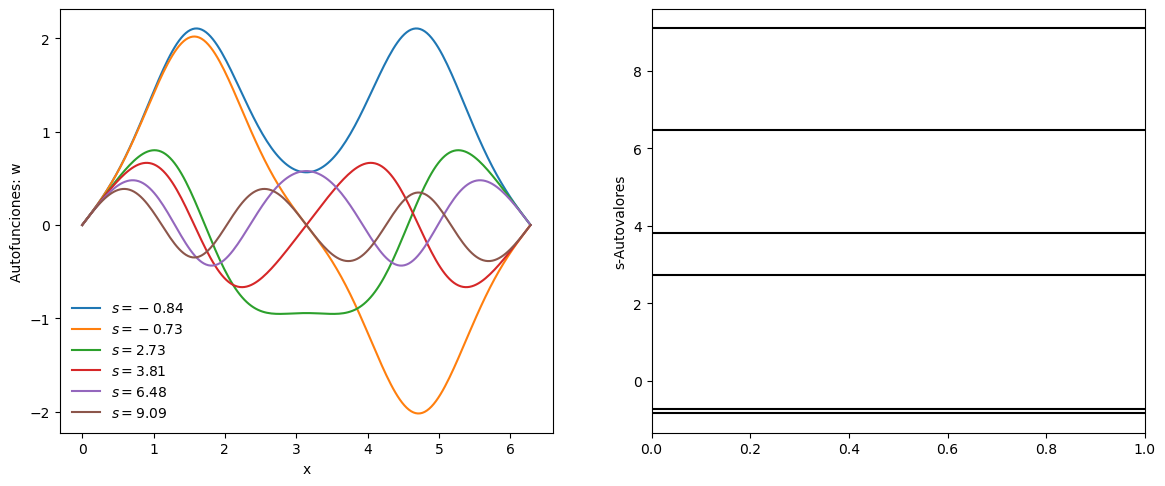

In [67]:
x0, xf = 0, 2*np.pi
npt = 200
y0v = [0, 1]  # fijamos w'=1
data = [y0v, x0, xf, npt]
x0, xf = 0, 6.5
npt = 200

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))
k = 0
for i in wP0:
    x, y = RK4Met(fs, data, arg=[i])
    ax[0].plot(x, y[:,0], label=r'$s=%3.2f$'%i)
    k += 1
  
ax[0].legend(frameon=False)
ax[0].set_ylabel('Autofunciones: w')
ax[0].set_xlabel('x')

for i in wP0:
    ax[1].hlines(y=i, xmin=0, xmax=1, color='k')

ax[1].set_ylabel(r's-Autovalores')
ax[1].set_xlim(0, 1)

### Implementación matricial

A continuación emplemos a nuestro problema:
<center><img src="capturas/215.png"></center>

la metodología *Matricial*. Notemos que debido a la condición de frontera los puntos discretos satisfacen: 
<center><img src="capturas/214.png"></center>

es decir, son periódico, por lo que como vimos anteriormente, es adecuado usar un generador de la forma 
<center><img src="capturas/216.png"></center>

Aproximando las derivadas usando la diferencia central tendremos:
<center><img src="capturas/217.png"></center>

lo que nos conduce a:
<center><img src="capturas/218.png"></center>

donde 
<center><img src="capturas/219.png"></center>

`Notemos varios detalles:`
- En la ecuación discreta aparece el parámetro $s$ a la derecha, multiplicando a $h w_i$. ¿Notan similitud a un problema de autovalores $A W=s W$?
- En este caso a diferencia del anterior incluimos $j=0, j=n-1$. Lo anterior puede entenderse de nuestro espaciado, como se aprecia $x_n=2\pi$, mientras que $x_{n-1}$ es antes, es decir:
<center><img src="capturas/220.png"></center>

- Por último nótese que como tenemos un problema de autovalores NO necesitamos conocer los valores de $w_0, w_{n-1}$, solo saber que $w_0=w_n$ (períodicidad). Al resolver el problema de autovalores encontraremos tanto el autovalor, como el autovector asociado, y como veremos eso es una ventaja.

Finalmente tendremos que nuestra matriz queda como:
<center><img src="capturas/221.png"></center>

lo cual no es más que un problema de autovalores
<center><img src="capturas/222.png"></center>

que nos permitirá encontrar tantos autovalores como la dimensión de la matriz.

In [68]:
# implementación
def matriz2(data, info=False, q=1.5):
    a, b, npt = data
    h = (b-a)/(npt-1)  # h = 2*np.pi/npt equivale a tomar a=0, b=2pi, npt-1=N
    xi = a + np.arange(npt)*h  # np.arange(npt)*h
    
    # creando alpha, beta, gamma discretos
    alphaj = -2-2*h**2*q*np.cos(2*xi)
    
    # Creando la matriz de dimensión n x n
    A = np.zeros((npt, npt))
    np.fill_diagonal(A[:, :], alphaj)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:-1, :], 1)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:, 2:], 1)  # recordar que no incluye el x_0
    A[0, -1] = 1
    A[0,-1] = 1
    
    if info:
        print(A)

    return A, xi, h

Usaremos [eig](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) de la librería `Scipy`

In [73]:
from scipy.linalg import eig

# Construyendo la matriz
a, b, npt = 0, 2*np.pi, 400+1
data = a, b, npt
A, xi, h = matriz2(data, info=False, q=1.5)

# Obtenemos los autovalores y los autovectores
# derechos usando scipy.linalg.eig
lEnig1, V1 = eig(A)

# Comprobando que los autovalores y autovectores son la solución del
# sistema Ax=Lx
test = []
for i in range(npt):
    ntest = np.allclose(A@V1[:, i]-(lEnig1[i]*V1[:, i]), np.zeros(npt, dtype=complex))
    test.append(ntest)
test = np.array(test)
print('Comprobando que se cumple Ax=Lx ->', test)
    

# Obteniendo la s verdadera
sEng = -np.copy(lEnig1)/h**2  # Lambda = -h^2 s
    
# Organizando de menor a mayor los autovalores
ii = np.argsort(sEng)  # devuelve los indices 
sEngF2 = sEng[ii] # ordenando los autovalores
VF1 = V1[:, ii]  # ordenando los autovectores

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [75]:
print('Los primero 10 Autovalores son \n', sEngF2[:10])

Los primero 10 Autovalores son 
 [-0.84272952+0.j -0.73332559+0.j  2.72780256-0.j  3.81388651-0.j
  6.47694756-0.j  9.09088441-0.j 12.34786266-0.j 16.06787525-0.j
 20.30011741-0.j 25.0340035 -0.j]


In [ ]:
[-0.8426695750586352,
 -0.7332651429439908,
 2.7279738415425756,
 3.8142909817959207,
 6.477781846295649,
 9.092609271931291]

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_90186/3967824905.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[0].plot(xi, y, label=r'$s-Autovalores=%3.2f$'%sEngF2[i])
/Users/armando/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


(0.0, 1.0)

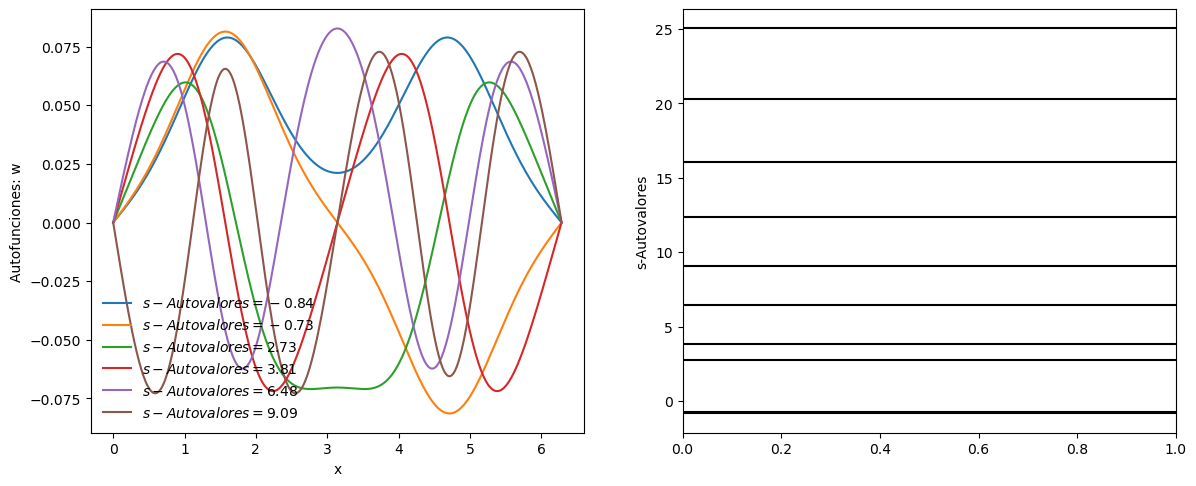

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))

for i in range(6):
    y = VF1[:, i]
    ax[0].plot(xi, y, label=r'$s-Autovalores=%3.2f$'%sEngF2[i])

  
ax[0].legend(frameon=False)
ax[0].set_ylabel('Autofunciones: w')
ax[0].set_xlabel('x')

for i in range(10):
    ax[1].hlines(y=sEngF2[i], xmin=0, xmax=1, color='k')

ax[1].set_ylabel(r's-Autovalores')
ax[1].set_xlim(0, 1)